In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statistics
from time import time
from scipy.stats import norm
import matplotlib.pyplot as plt

scaler=StandardScaler()
type(scaler)



def FrankeFunction(x,y): #code from task
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

#calculates R2 score and MSE
def R2(y_data, y_model): #week 35 exercise
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


def SVD(A): #week35 SVD
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    print("shape D= ", np.shape(D))
    print("Shape S= ",np.shape(S))
    print("lenVT =",len(VT))
    print("lenU =",len(U))
    D = np.eye(len(U),len(VT))*S
    """
    for i in range(0,VT.shape[0]): #was len(VT)
        D[i,i]=S[i]
        print("i=",i)"""
    return U @ D @ VT

#Makes a 3d plot of the franke function
def Plot_franke_function(): #code from task
	fig = plt.figure()
	ax = fig.gca(projection="3d")

	# Make data.
	x = np.arange(0, 1, 0.05)
	y = np.arange(0, 1, 0.05)
	x, y = np.meshgrid(x,y)
	z = FrankeFunction(x, y)

	# Plot the surface.
	surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
	linewidth=0, antialiased=False)

	# Customize the z axis.
	ax.set_zlim(-0.10, 1.40)
	ax.zaxis.set_major_locator(LinearLocator(10))
	ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

	# Add a color bar which maps values to colors.
	fig.colorbar(surf, shrink=0.5, aspect=5)
	plt.show()





#Setting up design matrix from week 35-36 lecture slides
def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X



def OLS_solver(designmatrix, datapoints):
	X = designmatrix
	z = datapoints


	#Splitting training and test data (20%test)
	X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

	#scaling the the input with standardscalar (week35)
	scaler = StandardScaler()
	scaler.fit(X_train)

	X_scaled = scaler.transform(X_train)

	#used to scale train and test
	z_mean = np.mean(z_train)
	z_sigma = np.std(z_train)

	z_train = (z_train- z_mean)/z_sigma


	#Singular value decomposition (removed as it doesn't work ref group teacher)
	#X_train = SVD(X_train) 


	# Calculating Beta Ordinary Least Square with matrix inversion
	ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train #psudoinverse

	#Scaling test data
	z_test = (z_test- z_mean)/z_sigma

	X_test = scaler.transform(X_test)

	ztilde = X_train @ ols_beta
	#print("Training R2")
	#print(R2(z_train,ztilde))
	#print("Training MSE")
	#print(MSE(z_train,ztilde))


	zpredict = X_test @ ols_beta
	#print("Test R2")
	#print(R2(z_test,zpredict))
	#print("Test MSE")
	#print(MSE(z_test,zpredict))
    
	print(z_sigma**2 * np.linalg.pinv(X_train.T @ X_train)) #Agree correct? beta_ols_variance = 
	return ols_beta, MSE(z_train,ztilde), MSE(z_test,zpredict)

In [ ]:
#------Task 2------

#setting up data
n = 500 #does it matter?

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 

sigma_N = 0.1; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) + sigma_N*np.random.randn(n)	#adding noise to the dataset

#gives a weird graph which does not bahve as expected
#Because bootsatrap is not implemented?
complexity = []
MSE_train_set = []
MSE_test_set = []


X = create_X(x, y, 40)
ols_beta, MSE_train, MSE_test = OLS_solver(X,z)




#not working as intended
for i in range(2,30): #goes out of range for high i?
	
	X = create_X(x, y, i)
	ols_beta, MSE_train, MSE_test = OLS_solver(X,z)
	complexity.append(i)
	MSE_train_set.append(MSE_train)
	MSE_test_set.append(MSE_test)



plt.plot(complexity,MSE_train_set, label ="train")  
plt.plot(complexity,MSE_test_set, label ="test")  
 

plt.xlabel("complexity")
plt.ylabel("MSE")
plt.title("Plot of the MSE as a function of complexity of the model")
plt.legend()
plt.grid()     
#plt.savefig('Task2plot(n='+str(n)+').pdf')
plt.show() 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statistics
from time import time
from scipy.stats import norm
import matplotlib.pyplot as plt


# FrankeFunction: a two-variables function to create the dataset of our vanilla problem
def FrankeFunction(x,y): #code from task
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

# Error analysis: MSE and R2 score
def R2(y_data, y_model): #week 35 exercise
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# SVD theorem
def SVD(A): #week35 SVD change to week 36
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    print("shape D= ", np.shape(D))
    print("Shape S= ",np.shape(S))
    print("lenVT =",len(VT))
    print("lenU =",len(U))
    D = np.eye(len(U),len(VT))*S
    """
    for i in range(0,VT.shape[0]): #was len(VT)
        D[i,i]=S[i]
        print("i=",i)"""
    return U @ D @ VT

#Makes a 3d plot of the franke function
def Plot_franke_function(): #code from task
	fig = plt.figure()
	ax = fig.gca(projection="3d")

	# Make data.
	x = np.arange(0, 1, 0.05)
	y = np.arange(0, 1, 0.05)
	x, y = np.meshgrid(x,y)
	z = FrankeFunction(x, y)

	# Plot the surface.
	surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
	linewidth=0, antialiased=False)

	# Customize the z axis.
	ax.set_zlim(-0.10, 1.40)
	ax.zaxis.set_major_locator(LinearLocator(10))
	ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

	# Add a color bar which maps values to colors.
	fig.colorbar(surf, shrink=0.5, aspect=5)
	plt.show()

#Setting up design matrix from week 35-36 lecture slides
def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta, number of feutures (order-degree of polynomial)
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

def Split_and_Scale(X,z,test_size=0.2, scale=True):

    #Splitting training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=test_size)

    #scaling the the input with standardscalar (week35)
    if scale==True:
        scaler=StandardScaler()
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)

        #used to scale train and test --> #why do you do it manually instead of using the Standard scaler?
        """z_mean = np.mean(z_train)
        z_sigma = np.std(z_train)

        z_train = (z_train- z_mean)/z_sigma"""

        #Scaling test data
        X_test = scaler.transform(X_test)
        #z_test = (z_test- z_mean)/z_sigma
      
    return X_train, X_test, z_train, z_test

def OLS_solver(X_train, X_test, z_train, z_test):

	# Calculating Beta Ordinary Least Square with matrix inversion
	ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train #psudoinverse
  
	z_tilde = X_train @ ols_beta
	z_predict = X_test @ ols_beta

	#beta_ols_variance = z_sigma**2 @ np.linalg.pinv(X_train.T @ X_train) #Agree correct?
	return ols_beta, z_tilde, z_predict


"""
Task 1 comments:
We still need to find the variance of beta.



What to plot? (use mesh, x,y, z and z_tilda?)
How to find confidence? y-y_tilda = sigma
Sima is the stardard deviation of the error?

print("Beta(ols) variance:") //variance of beta? or = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print(statistics.variance(ols_beta))


plt.plot(X_train,ztilde, label ="u values")   


"""


#------Task 1------

# Create vanilla dataset:
n = 1000

x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
#x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) + np.random.normal(mu_N,sigma_N,n)#adding noise to the dataset
print(np.max(z),np.min(z))
Plot_franke_function()

degree=5

# OLS
X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,z) #StardardScaler, test_size=0.2, scale=true
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

print("Training MSE", MSE(z_train,z_tilde))
print("Test MSE", MSE(z_test,z_predict))
print("-------------------------------------")
print("Training R2", R2(z_train,z_tilde))
print("Test R2", R2(z_test,z_predict))

# Missing confidence interval
# I would plot the data anyway


In [ ]:
nx, ny = (3, 2)
print(nx,ny)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
print(x)
print(y)
print(xv)
print(yv)
xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
print(xv)
print(yv)

In [ ]:
array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])
>>> yv
array([[0.,  0.,  0.],
       [1.,  1.,  1.]])
>>> xv, yv = np.meshgrid(x, y, sparse=True)  # make sparse output arrays
>>> xv
array([[0. ,  0.5,  1. ]])
>>> yv
array([[0.],
       [1.]])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statistics
from time import time
from scipy.stats import norm
import matplotlib.pyplot as plt


# FrankeFunction: a two-variables function to create the dataset of our vanilla problem
def FrankeFunction(x,y): #code from task
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4
 
# 3D plot of FrankeFunction
def Plot_franke_function(): #code from task
  fig = plt.figure()
  ax = fig.gca(projection="3d")

  # Make data.
  x = np.arange(0, 1, 0.05)
  y = np.arange(0, 1, 0.05)
  x, y = np.meshgrid(x,y)
  z = FrankeFunction(x, y)

  # Plot the surface.
  surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
  linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-0.10, 1.40)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.5, aspect=5)
  plt.show()

# Error analysis: MSE and R2 score
def R2(y_data, y_model): #week 35 exercise
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# SVD theorem
def SVD(A): #week35 SVD change to week 36
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    D = np.zeros((len(U),len(VT)))
    print("shape D= ", np.shape(D))
    print("Shape S= ",np.shape(S))
    print("lenVT =",len(VT))
    print("lenU =",len(U))
    D = np.eye(len(U),len(VT))*S
    """
    for i in range(0,VT.shape[0]): #was len(VT)
        D[i,i]=S[i]
        print("i=",i)"""
    return U @ D @ VT

# Design matrix
def create_X(x, y, n): # week 35-36 lecture slides
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta, number of feutures (order-degree of polynomial)
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

def Split_and_Scale(X,z,test_size=0.2, scale=True):

    #Splitting training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=test_size)

    #scaling the the input with standardscalar (week35)
    if scale==True:
        scaler_X = StandardScaler(with_std=False)
        scaler_X.fit(X_train)
        X_train = scaler_X.transform(X_train)
        X_test = scaler_X.transform(X_test)

        scaler_z = StandardScaler(with_std=False)
        #scaler_z.fit(z_train)
        z_train = np.squeeze(scaler_z.fit_transform(z_train.reshape(-1, 1)))
        z_test = np.squeeze(scaler_z.transform(z_test.reshape(-1, 1)))
      
        #used to scale train and test --> #why do you do it manually instead of using the Standard scaler?
        """z_mean = np.mean(z_train)
        z_sigma = np.std(z_train)
        z_train = (z_train- z_mean)/z_sigma"""
        #z_test = (z_test- z_mean)/z_sigma
      
    return X_train, X_test, z_train, z_test

def OLS_solver(X_train, X_test, z_train, z_test):

	# Calculating Beta Ordinary Least Square with matrix inversion
	ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train #psudoinverse
  
	z_tilde = X_train @ ols_beta
	z_predict = X_test @ ols_beta

	#beta_ols_variance = z_sigma**2 @ np.linalg.pinv(X_train.T @ X_train) #Agree correct?
	return ols_beta, z_tilde, z_predict


"""
Task 1 comments:
We still need to find the variance of beta.



What to plot? (use mesh, x,y, z and z_tilda?)
How to find confidence? y-y_tilda = sigma
Sima is the stardard deviation of the error?

print("Beta(ols) variance:") //variance of beta? or = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print(statistics.variance(ols_beta))


plt.plot(X_train,ztilde, label ="u values")   


"""


#------Task 1------

# Create vanilla dataset:
n = 1000

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 

sigma_N = 0.1; mu_N = 0 #change for value of sigma_N to appropriate values
z = FrankeFunction(x,y) + np.random.randn(n)	#adding noise to the dataset

degree=5

# OLS
X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,z) #StardardScaler, test_size=0.2, scale=true
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

print("Training MSE", MSE(z_train,z_tilde))
print("Test MSE", MSE(z_test,z_predict))
print("-------------------------------------")
print("Training R2", R2(z_train,z_tilde))
print("Test R2", R2(z_test,z_predict))

# Missing confidence interval
# I would plot the data anyway


(40,)
(40, 1)
(8, 1) (8, 100)
Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
(8, 1) (8, 100)
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.07968918676726028
Var: 0.004579219539673834
0.08426840630693411 >= 0.07968918676726028 + 0.004579219539673834 = 0.08426840630693411
(8, 1) (8, 100)
Polynomial degree: 2
Error: 0.10398646080125036
Bias^2: 0.10077114273548984
Var: 0.00321531806576051
0.10398646080125036 >= 0.10077114273548984 + 0.00321531806576051 = 0.10398646080125035
(8, 1) (8, 100)
Polynomial degree: 3
Error: 0.06547790180152356
Bias^2: 0.06208238634231951
Var: 0.003395515459204095
0.06547790180152356 >= 0.06208238634231951 + 0.003395515459204095 = 0.0654779018015236
(8, 1) (8, 100)
Polynomial degree: 4
Error: 0.0684451941400944
Bias^2: 0.06453579006728317
Var: 0.00390940407281122
0.0684451941400944 >= 0.06453579006728317 + 0.00390940

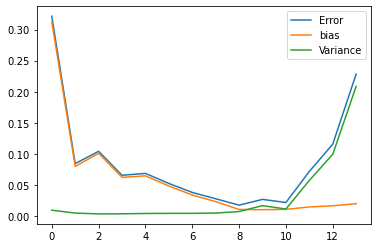

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n)
print(x.shape)
x=x.reshape(-1, 1)
print(x.shape)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    print(y_test.shape, y_pred.shape)
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()